In [13]:
#Pip install tensorflow==2.8.0

In [17]:
import pickle
import json
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [2]:
# Download required data from nltk.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Meme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Meme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Preprocessing

In [4]:
words = []
classes = []
documents = []
ignore_letters = ['!', '?', ',', '.']
intents_file = open('intents.json').read()
intents = json.loads(intents_file)

for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word
        word = nltk.word_tokenize(pattern)
        words.extend(word)
        # add documents in the corpus
        documents.append((word, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# lemmaztize and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower())
         for w in words if w not in ignore_letters]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))



In [5]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
# documents = combination between patterns and intents
print(len(documents), "documents")
# classes = intents
print(len(classes), "classes")
# words = all words, vocabulary
print(len(words), "unique lemmatized words")


68 documents
25 classes
135 unique lemmatized words


In [7]:
# print the classes 
classes

['Are antibiotics effective in preventing or treating the COVID-19',
 'Are there any medicines or therapies that can prevent or cure COVID-19',
 'COVID-19 vaccine cause a COVID-19 infection',
 'COVID-19 vaccine different from the influenza (flu) vaccine',
 'How does COVID 19 spread?',
 'How likely am I to catch COVID-19?',
 'How long can you test positive',
 'Is there a vaccine, drug or treatment for COVID-19',
 'Should I worry about COVID-19',
 'Transportation to COVID-19 vaccination clinics',
 'What are the symptoms of COVID 19?',
 'What can I do to protect myself and prevent the spread of disease?',
 'What is COVID-19?',
 'What is a coronavirus?',
 'Why would I want to get the COVID-19 vaccine',
 'appointment if I do not have an Ontario health card',
 "difference between a 'three dose primary series' and a 'booster dose'?",
 'get virus by touching surfaces',
 'goodbye',
 'greeting',
 'incubation period',
 'prevent COVID-19',
 'thanks',
 'third (booster) dose of the COVID-19 vaccine'

In [8]:
#print words 
words

["'",
 "'booster",
 "'s",
 "'three",
 '(',
 ')',
 '19',
 'a',
 'about',
 'after',
 'alot',
 'am',
 'an',
 'and',
 'antibiotic',
 'any',
 'anyone',
 'appointment',
 'are',
 'awesome',
 'between',
 'book',
 'booster',
 'bubye',
 'by',
 'bye',
 'can',
 'card',
 'catch',
 'cause',
 'chatting',
 'clinic',
 'coronavirus',
 'covid',
 'covid-19',
 'cure',
 'cya',
 'difference',
 'different',
 'disease',
 'do',
 'doe',
 'dose',
 'drug',
 'effect',
 'effected',
 'effective',
 'even',
 'everyone',
 'flu',
 'follow',
 'for',
 'from',
 'get',
 'goodbye',
 'have',
 'having',
 'health',
 'hello',
 'helpful',
 'helping',
 'hey',
 'heylo',
 'hi',
 'hola',
 'how',
 'i',
 'if',
 'in',
 'incubation',
 'infection',
 'influenza',
 'is',
 'last',
 'later',
 'likely',
 'long',
 'major',
 'me',
 'measure',
 'medicine',
 'much',
 'myself',
 'next',
 'nice',
 'not',
 'of',
 'ontario',
 'or',
 'para',
 'period',
 'positive',
 'prevent',
 'preventing',
 'primary',
 'protect',
 'protection',
 'public',
 'red',
 're

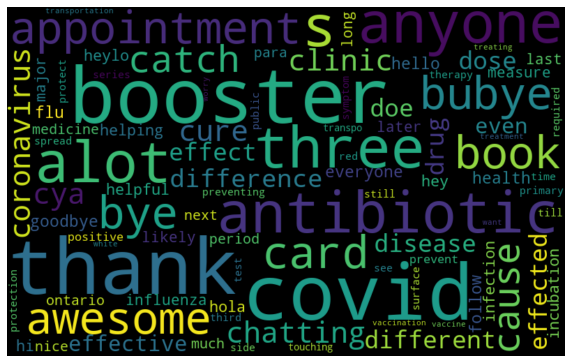

In [9]:
# Word cloud for fake news
import matplotlib.pyplot as plt
from wordcloud import WordCloud


all_words = ' '.join(words)

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

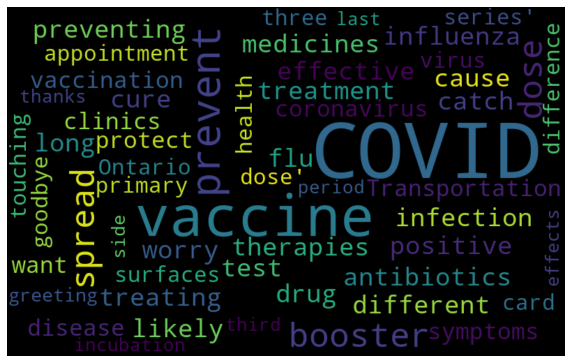

In [10]:
all_words = ' '.join(classes)
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
documents 

[(['Hi', 'there'], 'greeting'),
 (['How', 'are', 'you'], 'greeting'),
 (['Is', 'anyone', 'there', '?'], 'greeting'),
 (['Hey'], 'greeting'),
 (['Hola'], 'greeting'),
 (['Hello'], 'greeting'),
 (['Heylo'], 'greeting'),
 (['Bye'], 'goodbye'),
 (['See', 'you', 'later'], 'goodbye'),
 (['Goodbye'], 'goodbye'),
 (['Nice', 'chatting', 'to', 'you', ',', 'bye'], 'goodbye'),
 (['Till', 'next', 'time'], 'goodbye'),
 (['Cya'], 'goodbye'),
 (['Bubye'], 'goodbye'),
 (['What', 'is', 'a', 'coronavirus'], 'What is a coronavirus?'),
 (['What', 'is', 'covid', '19'], 'What is COVID-19?'),
 (['symptoms', 'of', 'covid', '19'], 'What are the symptoms of COVID 19?'),
 (['symptoms', 'of', 'coronavirus'], 'What are the symptoms of COVID 19?'),
 (['covid', '19', 'symptoms'], 'What are the symptoms of COVID 19?'),
 (['coronavirus', 'symptoms'], 'What are the symptoms of COVID 19?'),
 (['How', 'does', 'COVID', '19', 'spread'], 'How does COVID 19 spread?'),
 (['How', 'does', 'coronavirus', 'spread'], 'How does COVI

# Traning 

In [12]:
pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))

# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(
        word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for word in words:
        bag.append(1) if word in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:, 0])
train_y = list(training[:, 1])
print("Training data created")



Training data created


<ipython-input-12-4f3db852743a>:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


# Modling 

In [13]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd, metrics=['accuracy'])

# fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y),
                 epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

print("model created")


C:\Users\Meme\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
14/14 [==============================] - 0s 2ms/step - loss: 3.2658 - accuracy: 0.0588
Epoch 2/200
14/14 [==============================] - 0s 1ms/step - loss: 3.1206 - accuracy: 0.1029
Epoch 3/200
14/14 [==============================] - 0s 1ms/step - loss: 3.0027 - accuracy: 0.1765
Epoch 4/200
14/14 [==============================] - 0s 1ms/step - loss: 2.8504 - accuracy: 0.2647
Epoch 5/200
14/14 [==============================] - 0s 1ms/step - loss: 2.8008 - accuracy: 0.2647
Epoch 6/200
14/14 [==============================] - 0s 1ms/step - loss: 2.6417 - accuracy: 0.2794
Epoch 7/200
14/14 [==============================] - 0s 786us/step - loss: 2.2203 - accuracy: 0.5000
Epoch 8/200
14/14 [==============================] - 0s 1ms/step - loss: 2.4170 - accuracy: 0.2647
Epoch 9/200
14/14 [==============================] - 0s 1ms/step - loss: 1.9450 - accuracy: 0.4706
Epoch 10/200
14/14 [==============================] - 0s 2ms/step - loss: 1.8578 - accuracy: 0.4559
Epoch 1

14/14 [==============================] - 0s 1ms/step - loss: 0.1647 - accuracy: 0.9412
Epoch 83/200
14/14 [==============================] - 0s 474us/step - loss: 0.2719 - accuracy: 0.9265
Epoch 84/200
14/14 [==============================] - 0s 471us/step - loss: 0.2228 - accuracy: 0.9265
Epoch 85/200
14/14 [==============================] - 0s 431us/step - loss: 0.1034 - accuracy: 0.9559
Epoch 86/200
14/14 [==============================] - 0s 323us/step - loss: 0.2692 - accuracy: 0.9118
Epoch 87/200
14/14 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9412
Epoch 88/200
14/14 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.9559
Epoch 89/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2912 - accuracy: 0.9118
Epoch 90/200
14/14 [==============================] - 0s 1ms/step - loss: 0.1328 - accuracy: 0.9853
Epoch 91/200
14/14 [==============================] - 0s 1ms/step - loss: 0.1813 - accuracy: 0.9559
Epoch

14/14 [==============================] - 0s 1ms/step - loss: 0.0623 - accuracy: 0.9559
Epoch 163/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0776 - accuracy: 0.9559
Epoch 164/200
14/14 [==============================] - 0s 1ms/step - loss: 0.1045 - accuracy: 0.9559
Epoch 165/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0814 - accuracy: 0.9706
Epoch 166/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.9853
Epoch 167/200
14/14 [==============================] - 0s 867us/step - loss: 0.0438 - accuracy: 0.9853
Epoch 168/200
14/14 [==============================] - 0s 436us/step - loss: 0.0552 - accuracy: 0.9853
Epoch 169/200
14/14 [==============================] - 0s 296us/step - loss: 0.0320 - accuracy: 1.0000
Epoch 170/200
14/14 [==============================] - 0s 284us/step - loss: 0.1024 - accuracy: 0.9706
Epoch 171/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0586 - accuracy: 1.0

# Get AI chatbot responses 

In [14]:
import os
from keras.models import load_model
lemmatizer = WordNetLemmatizer()

In [15]:
nltk.download('omw-1.4')
model = load_model(os.path.join( 'chatbot_model.h5'))
intents = json.loads(
    open(os.path.join( 'intents.json')).read())
# intents = json.loads(open(os.path.join( 'intents.json')).read().decode("utf-8-sig"))
words = pickle.load(
    open(os.path.join(  'words.pkl'), 'rb'))
classes = pickle.load(
    open(os.path.join(  'classes.pkl'), 'rb'))



def clean_up_sentence(sentence):
    # tokenize the pattern - splitting words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stemming every word - reducing to base form
    sentence_words = [lemmatizer.lemmatize(
        word.lower()) for word in sentence_words]
    return sentence_words


# return bag of words array: 0 or 1 for words that exist in sentence
def bag_of_words(sentence, words, show_details=True):
    # tokenizing patterns
    sentence_words = clean_up_sentence(sentence)
    # bag of words - vocabulary matrix
    bag = [0]*len(words)
    for s in sentence_words:
        for i, word in enumerate(words):
            if word == s:
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                #if show_details:
                    #print("found in bag: %s" % word)
    #print("np.array(bag)", np.array(bag))
    return(np.array(bag))


def predict_class(sentence):
    # filter below  threshold predictions
    p = bag_of_words(sentence, words, show_details=True)
    flag = False
    return_list = []
    for x in p:
        if x == 1:
            flag = True
    if (flag == True):
        res = model.predict(np.array([p]))[0]
        ERROR_THRESHOLD = 0.25
        results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
        # sorting strength probability
        results.sort(key=lambda x: x[1], reverse=True)

        #print("result", results)
        for r in results:
            return_list.append(
                {"intent": classes[r[0]], "probability": str(r[1])})
    else:
        return_list.append({"intent": "noanswer", "probability": str(1)})

    return return_list


def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag'] == tag):
            result = random.choice(i['responses'])
            break
    return result


def chatbot_response(msg):
    ints = predict_class(msg)
    #print('ints', ints)
    res = getResponse(ints, intents)
    #print('res', res)
    return res

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Meme\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# test Cahtbot(run)

In [ ]:
# test chatbot 
from termcolor import colored
print ("CHAT START (BLANK AND ENTER TO STOP)")
try:
    while (1):
        x=input(colored("YOU:",'red'))
        if (x.strip()==""):
            break
        print ( colored("CHATBOT:",'blue'), colored(chatbot_response(x),'green'))
except:
    print("ERROR")

print("CHAT END")


CHAT START (BLANK AND ENTER TO STOP)
YOU:hi
CHATBOT: Hello
YOU:should I get the booster doses?
CHATBOT: Third (booster doses) of mRNA COVID-19 vaccines are readily available to strengthen protection against severe illness and complications due to COVID-19. There is now evidence of a gradual decrease in vaccine effectiveness over time following the second dose. An Ontario study indicates that vaccine effectiveness decreases following a second dose and increases following a third dose. A third, booster dose, of the COVID-19 vaccine will help restore and maintain protection against infection and help reduce your risk of severe illness, complication, or death due to COVID-19.
YOU:what are the covid -19 symptoms?
CHATBOT: The most common symptoms of COVID-19 are fever, tiredness, and dry cough. Some patients may have aches and pains, nasal congestion, runny nose, sore throat or diarrhea. These symptoms are usually mild and begin gradually. Some people become infected but dont develop any sy